In [1]:
import sys
import warnings
import itertools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from pylab import rcParams
from IPython.display import display
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import  qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load CSV

In [27]:
df = pd.read_csv("TractorSales.csv",parse_dates=True)
df.head()

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [28]:
df['Month-Year'].unique()

array(['3-Jan', '3-Feb', '3-Mar', '3-Apr', '3-May', '3-Jun', '3-Jul',
       '3-Aug', '3-Sep', '3-Oct', '3-Nov', '3-Dec', '4-Jan', '4-Feb',
       '4-Mar', '4-Apr', '4-May', '4-Jun', '4-Jul', '4-Aug', '4-Sep',
       '4-Oct', '4-Nov', '4-Dec', '5-Jan', '5-Feb', '5-Mar', '5-Apr',
       '5-May', '5-Jun', '5-Jul', '5-Aug', '5-Sep', '5-Oct', '5-Nov',
       '5-Dec', '6-Jan', '6-Feb', '6-Mar', '6-Apr', '6-May', '6-Jun',
       '6-Jul', '6-Aug', '6-Sep', '6-Oct', '6-Nov', '6-Dec', '7-Jan',
       '7-Feb', '7-Mar', '7-Apr', '7-May', '7-Jun', '7-Jul', '7-Aug',
       '7-Sep', '7-Oct', '7-Nov', '7-Dec', '8-Jan', '8-Feb', '8-Mar',
       '8-Apr', '8-May', '8-Jun', '8-Jul', '8-Aug', '8-Sep', '8-Oct',
       '8-Nov', '8-Dec', '9-Jan', '9-Feb', '9-Mar', '9-Apr', '9-May',
       '9-Jun', '9-Jul', '9-Aug', '9-Sep', '9-Oct', '9-Nov', '9-Dec',
       '10-Jan', '10-Feb', '10-Mar', '10-Apr', '10-May', '10-Jun',
       '10-Jul', '10-Aug', '10-Sep', '10-Oct', '10-Nov', '10-Dec',
       '11-Jan', '11-Feb',

#### 1. Write a code to convert/split the data as per frequency.

In [29]:
def convert_year_month(val):
    yr = str(int(val.split('-')[0]) + 2000)
    mnt = val.split('-')[1]
    mnt_yr = mnt + "-" + yr
    return datetime.strptime(mnt_yr, '%b-%Y')

In [30]:
df['date'] = df.apply(lambda x : convert_year_month(x['Month-Year']), axis = 1)
df.head()

,Month-Year,Number of Tractor Sold,date
0,3-Jan,141,2003-01-01
1,3-Feb,157,2003-02-01
2,3-Mar,185,2003-03-01
3,3-Apr,199,2003-04-01
4,3-May,203,2003-05-01


In [31]:
df.dtypes

Month-Year                        object
Number of Tractor Sold             int64
date                      datetime64[ns]
dtype: object

#### 2.  Write a code to extract the time-series and plot the graph,and provide the inference's accordingly.

In [32]:
df.drop(columns=['Month-Year'],inplace=True)
df.set_index('date',inplace=True)
df.rename(columns={'Number of Tractor Sold':'TractorSales'},inplace=True)
df.head()

,TractorSales
date,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


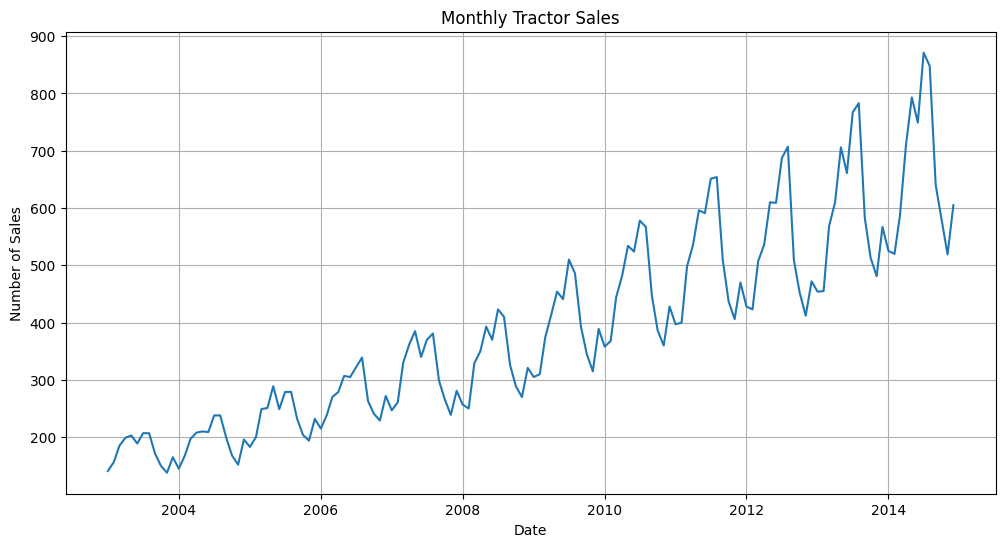

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TractorSales'])
plt.title('Monthly Tractor Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

#### 3. Write a code to determine the rolling statistics(i.e - Original,Rolling mean,Rolling Standard deviation) and plot a graph accordingly.


In [37]:
window_size = 12
rolling_mean = df['TractorSales'].rolling(window=window_size).mean()
rolling_std = df['TractorSales'].rolling(window=window_size).std()

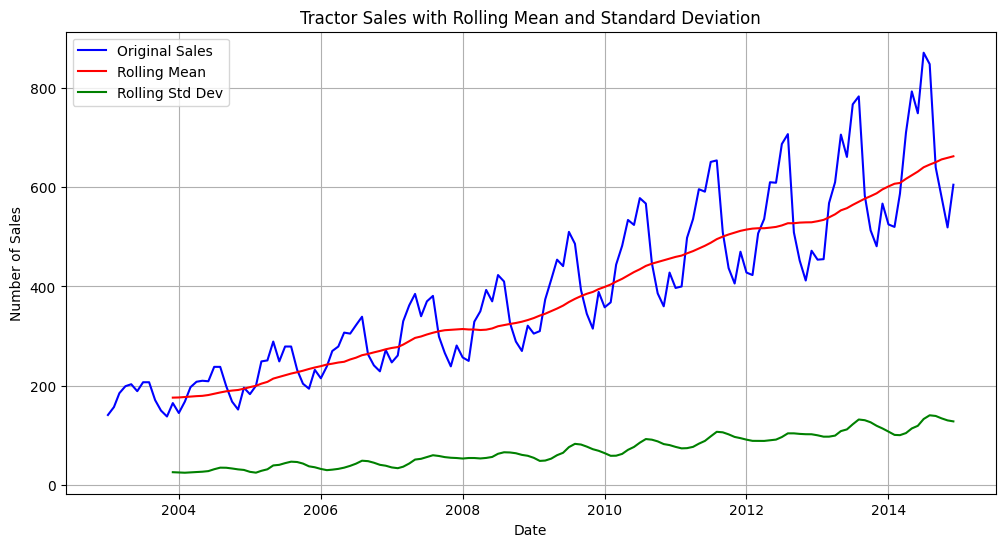

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['TractorSales'], label='Original Sales', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Tractor Sales with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend(loc='best')
plt.grid(True)

#### 4. Write a code to test the stationarity of data.

In [52]:
observations= df.values
test_result = adfuller(observations)
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))



if test_result[1] > 0.05:
    print("The series is non-stationary, differencing is required.")
else:
    print("The series is stationary, no differencing is needed.")

ADF Statistic: 1.108825
p-value: 0.995291
Critical Values:
	1%: -3.48209
	5%: -2.88422
	10%: -2.57886
The series is non-stationary, differencing is required.


#### The p- value = 0.99 > 0.05 .Therefore we fail to reject H0 , Series is not stationary

#### 5. Write a code to perform the decomposition of data if there is an existence of seasonality and split the data accordingly.

[]

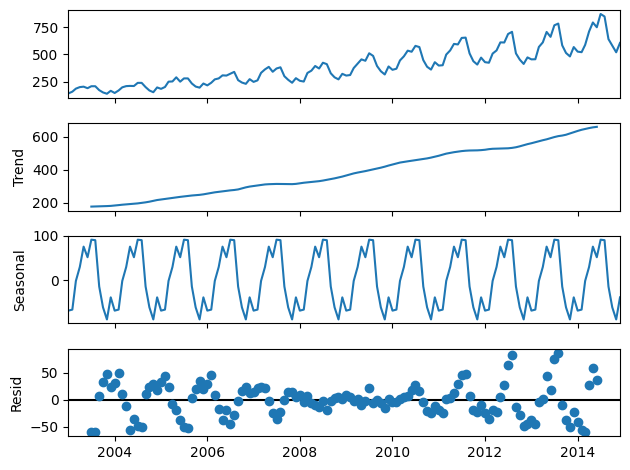

In [42]:
decomp_add = seasonal_decompose(df,model='add',period=12)
decomp_add.plot()
plt.plot()

[]

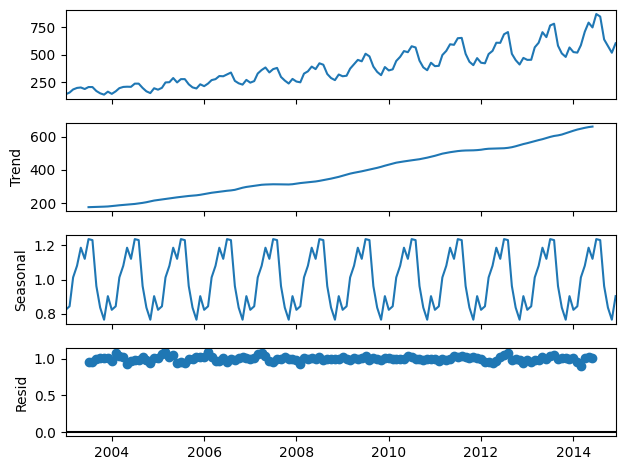

In [43]:
decomp_mul = seasonal_decompose(df,model='mul',period=12)
decomp_mul.plot()
plt.plot()

#### 6. Write a code which represent the distribution of the data, if there is an existence of seasonality in an visualisation plot and provide inferences accordingly.

In [44]:
df1 = df.copy()
df1['month'] = df1.index.month
df1['year'] = df1.index.year
df1.head()

,TractorSales,month,year
date,,,
2003-01-01,141,1,2003
2003-02-01,157,2,2003
2003-03-01,185,3,2003
2003-04-01,199,4,2003
2003-05-01,203,5,2003


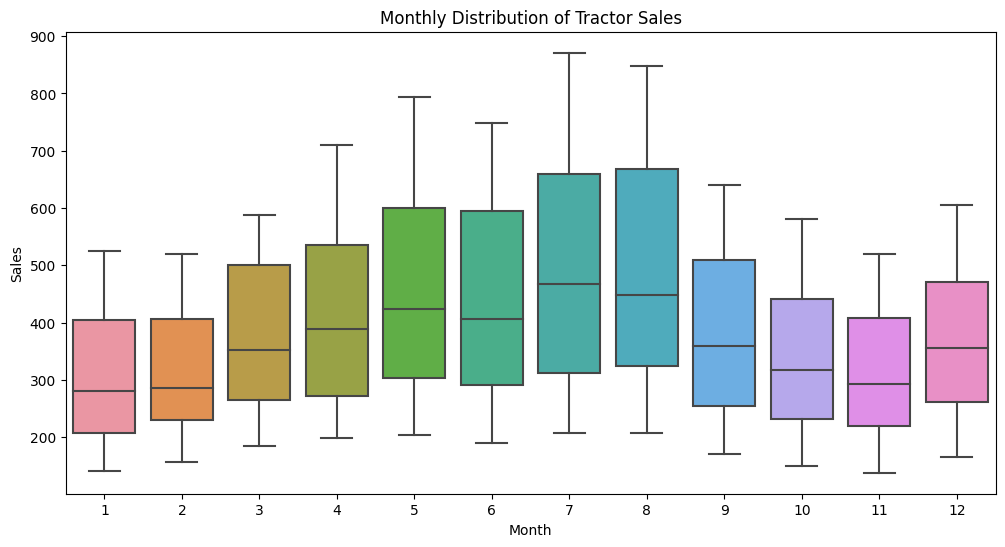

In [48]:
# Box plot to show distribution of sales for each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='TractorSales', data=df1)
plt.title('Monthly Distribution of Tractor Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

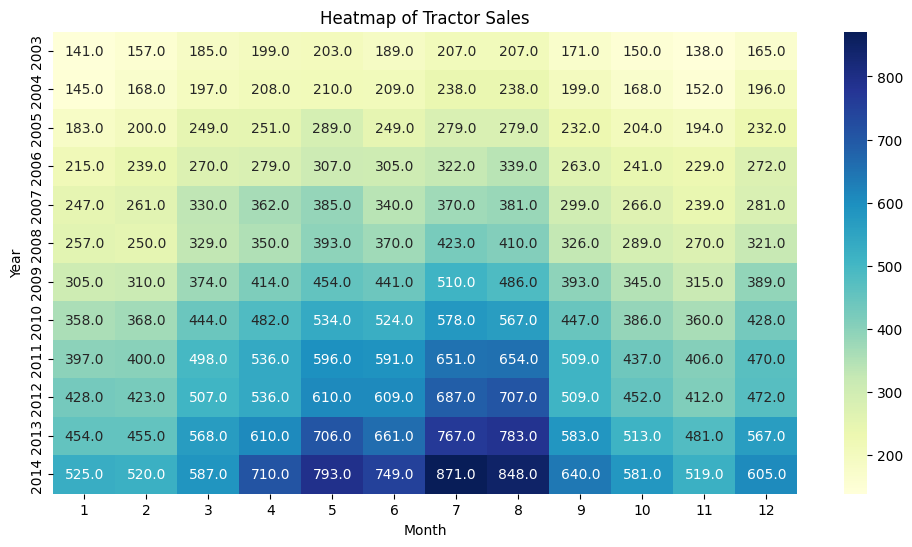

In [50]:
# Heatmap to visualize seasonality
pivot_table = df1.pivot_table(values='TractorSales', index='year', columns='month', aggfunc=np.mean)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Tractor Sales')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

#### 7. After the decomposition of the data, provide the detail inferences as per the interpretation.

#### 8. Write a code to perform the differencing if the data was non-stationary and kindly represent it in all the possible visualisation plot for better interpretation and provide the inferences, i.e which include ACF,PACF.

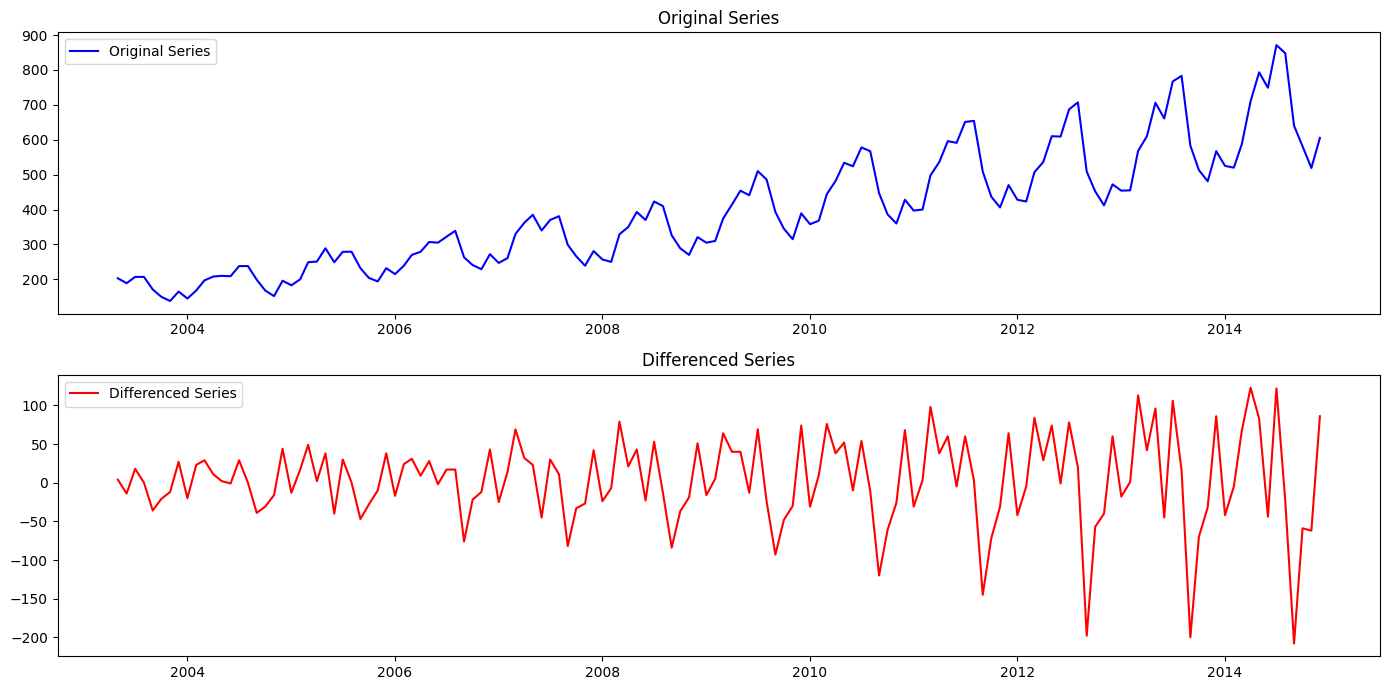

In [56]:
df1['Sales_diff'] = df1['TractorSales'].diff()
df1.dropna(inplace=True)

plt.figure(figsize=(14, 7))
plt.subplot(211)
plt.plot(df1['TractorSales'], label='Original Series', color='blue')
plt.title('Original Series')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(df1['Sales_diff'], label='Differenced Series', color='red')
plt.title('Differenced Series')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

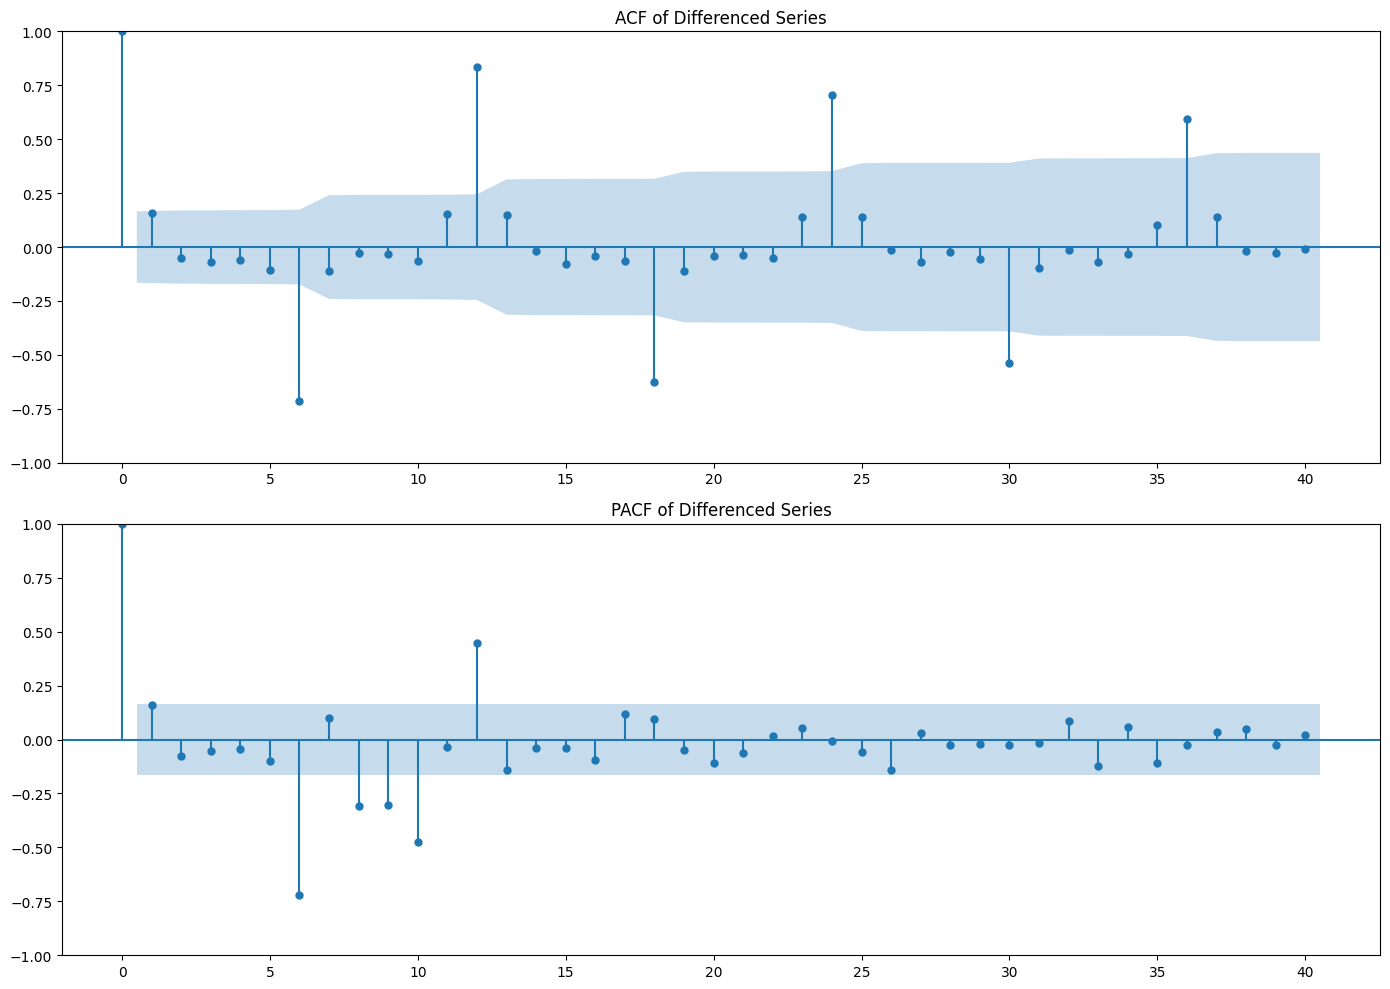

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# ACF plot
plot_acf(df1['Sales_diff'].dropna(), lags=40, ax=ax[0])
ax[0].set_title('ACF of Differenced Series')

# PACF plot
plot_pacf(df1['Sales_diff'].dropna(), lags=40, ax=ax[1])
ax[1].set_title('PACF of Differenced Series')

plt.tight_layout()
plt.show()

#### 9. Write a code to fit the model  and perform predictions on test data and provide the inference's accorindly i.e if non stationary with ARIMA, if seasonality and non stationary with SARIMA .

In [63]:
train, test = train_test_split(df,test_size=(36/df1.shape[0]),random_state=10,shuffle=False)
print(f"Train size = {train.shape[0]} and Test size = { test.shape[0]}")

Train size = 106 and Test size = 38


In [64]:
#as per acf & pacf --> q=1 and p=1
## Example order: (p, d, q) = (1, 1, 1) and seasonal order: (P, D, Q, s) = (1, 1, 1, 12)
model_SARIMA = SARIMAX(train, 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 12), 
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

model_SARIMA_fit = model_SARIMA.fit()

model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       TractorSales   No. Observations:                  106
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -322.949
Date:                            Wed, 29 May 2024   AIC                            655.898
Time:                                    18:39:58   BIC                            667.746
Sample:                                01-01-2003   HQIC                           660.645
                                     - 10-01-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8409      0.143     -5.867      0.000      -1.122      -0.560
ma.L1          0.7492      0.189      3.970      0.000       0.379       1.119
ar.S.L12      -0.5852      0.137     -4.280      0.000      -0.853      -0.317
ma.S.L12       0.5303      0.228      2.327      0.020       0.084       0.977
sigma2       197.3568     42.637      4.629      0.000     113.789     280.924
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.41   Prob(JB):                         0.76
Heteroskedasticity (H):               0.97   Skew:                             0.03
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

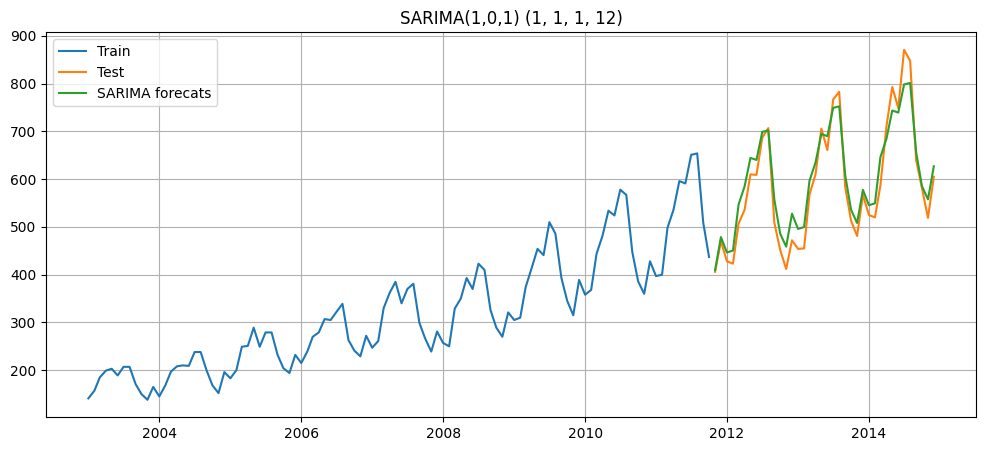

In [65]:
forecast_SARIMA = model_SARIMA_fit.forecast(steps=len(test))

plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_SARIMA, label='SARIMA forecats')
plt.legend(loc='best')
plt.title("SARIMA(1,0,1) (1, 1, 1, 12)")
plt.grid()

### END